## Tugas 07 Data Mining

Nama: Muh. Yusuf Syam<br>
NIM: H071191044

<h1 align="center"> Machine Learning Performance Measure </h1><br>

Performance Measure adalah proses evaluasi atau analisis terhadap model machine learning menggunakan algoritma-algoritma tertentu. Performance Measure untuk setiap task Machine Learning berbeda-beda, misalnya untuk task classification terdapat accuraccy score sementara pada task reggression terdapat mean absolute error

Pertama-tama kita mengimport library yang dibutuhkan

In [1]:
# Library untuk mengolah data
import pandas as pd
import numpy as np

# Library untuk preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Library untuk Classification dan performance measurenya
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Library untuk Regression dan performance measurenya
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score

# Library untuk Clustering dan performance measurenya
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Classification

Classification merupakan task supervised learning (pembelajaran dengan pengawasan) pada machine learning untuk memprediksi y atau kelas/label/target berdasarkan data(x) yang diberikan sebelumnya.

Contoh performance measure pada classification:
* accuraccy score
* precision
* recall
* f1-score
* confusion matrix
* roc-curve

Berikut contoh classification beserta performance measure nya.

Menggenerate dataset klasifikasi:
* 1000 baris x 21 kolom (20 fitur dan 1 target)
* Kelas target berjumlah 3

In [2]:
# Mendefinisikan dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

Membagi data menjadi data train(uji) dan data test, dengan ukuran data test yaitu 0.4 atau 40% dari keseluruhan dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Membuat model classification. Metode/algoritma classification yang digunakan adalah logistic regression dengan strategi One-vs-Rest yang mana membagi classification multi-kelas menjadi satu masalah classification biner per kelas/label

In [4]:
# Membuat model One-vs-Rest, parameter pertama yaitu estimator/metode yang digunakan, yaitu logistic reggression
clf = OneVsRestClassifier(LogisticRegression())

# Melatih model
clf.fit(X_train, y_train)

# Memprediksi kelas dari x_test menggunakan model yang dibuat
pred = clf.predict(X_test)

Karena predict() hanya mengembalikan kelas dengan probabilitas tertinggi, maka kita memanggil fungsi predict_proba. predict_proba merupakan fungsi yang mengembalikan probilitas x yang diberikan terhadap setiap kelas, predict_proba digunakan salah satunya untuk evaluasi confusion matrix

In [5]:
# Memanggil fungsi predict_proba()
pred_prob = clf.predict_proba(X_test)

# Mengambil kolom kedua dari pred_prob
y_pred_proba_positive = pred_prob[:,1]

# Mendefinisikan y_true sama dengan y_test
y_true = y_test

#### 1. Accuracy Score

Merupakan skor akurasi klasifikasi, Cara menghitung accuraccy score: $\frac{Jumlah\,Prediksi\,Benar}{Total\,Seluruh\,Prediksi}$

In [6]:
# Menghitung accuraccy score
CA=accuracy_score(y_true, pred)

# Menghitung accuraccy score tapi tidak dinormalisasi, artinya mengembalikan jumlah mentah hasil classification yang benar
NCCS=accuracy_score(y_true, pred, normalize=False)

Accuraccy score

In [7]:
'{:.2f}%'.format(CA*100)

'61.75%'

Jumlah classification yang benar

In [8]:
NCCS

247

#### 2. Precision, Recall, dan F1-Score

__a. Precision__


adalah berapa banyak / proporsi prediksi yang benar di antara semua prediksi dari kelas tertentu. Dengan kata lain, ini adalah proporsi true positif di antara semua prediksi positif. Cara menghitung precision: $\frac{TP}{TP+FT}$

Precision (precision dari hasil prediksi label 1-3 dari kiri ke kanan secara berurutan)

In [9]:
precision_score(y_true, pred, average=None)

array([0.62251656, 0.45238095, 0.6969697 ])

__b. Recall__

adalah seberapa relevan proporsi prediksi benar yang dihasilkan. Dengan kata lain, ini adalah proporsi true positif di antara semua contoh yang true. Cara menghitung precision: $\frac{TP}{FN+TP}$

In [10]:
recall_score(y_true, pred, average=None)

array([0.70676692, 0.29230769, 0.83941606])

__c. F1-Score__


adalah rata-rata harmonik dari Precision dan Recall. Cara menghitung f1-score: $2\times \frac{Precision\times {Recall}}{Precision+ {Recall}}$

In [11]:
f1_score(y_true, pred, average=None)

array([0.66197183, 0.35514019, 0.7615894 ])

__d. Classification Report__

merupakan evaluasi yang memperlihatkan hasil precision, recall, f1-score, serta support dengan tampilan yang lebih ringkas dan jelas

In [12]:
labels = ["label1","label2","label3"]

print(classification_report(y_true, pred, target_names=labels))

              precision    recall  f1-score   support

      label1       0.62      0.71      0.66       133
      label2       0.45      0.29      0.36       130
      label3       0.70      0.84      0.76       137

    accuracy                           0.62       400
   macro avg       0.59      0.61      0.59       400
weighted avg       0.59      0.62      0.60       400



#### 3. Confusion Matrix

Confusion Matrix merupakan metrik evaluasi yang memberikan informasi perbandingan hasil klasifikasi model dengan hasil klasifikasi sebenarnya

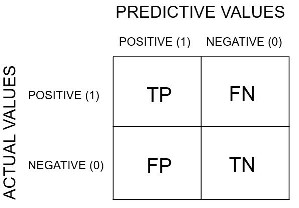

Menghitung confusion matrix. Confusion matrix dari sklearn mengasumsikan nilai prediksi secara vertikal, dan nilai aktual/expected secara horizontal. Selanjutnya ditampilkan dalam bentuk array

In [13]:
# Menghitung confusion matrix
cm = confusion_matrix(pred, y_true)
cm

array([[ 94,  50,   7],
       [ 31,  38,  15],
       [  8,  42, 115]], dtype=int64)

Visualisasi confusion matrix menggunakan seaborn. Karena pada fungsi confusion matrix pada cell atas parameter y_true dan y_pred nya terbalik, maka posisi predicted berubah menjadi horizontal, dan aktual menjadi vertikal 

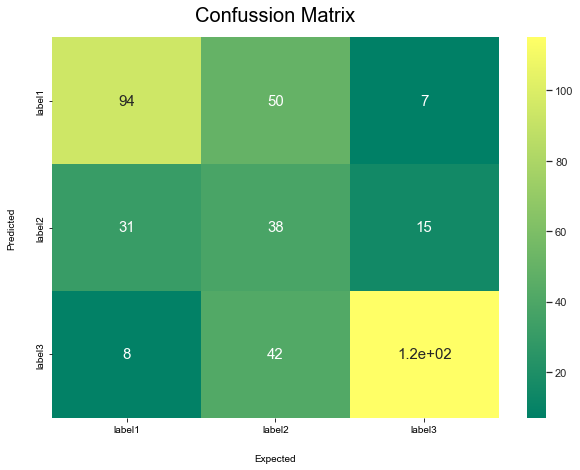

In [14]:
# Membuat dataframe yang akan divisualisasikan dengan plot heatmap
model_df_cm = pd.DataFrame(cm, labels, labels)

# Menyetel atribut visualisasi
plt.figure(figsize = (10,7))
plt.title('Confussion Matrix', pad=16, size=20) 
sns.set(font_scale=1) #for label size 

# Membuat plot heatmap
sns.heatmap(model_df_cm, annot=True, annot_kws={"size": 15}, cmap='summer') # font size 

# Mendefinisikan x label dan y label
plt.ylabel('Predicted', labelpad=20)
plt.xlabel('Expected', labelpad=20)
plt.show()

#### 4. ROC-Curve

ROC-Curve adalah grafik/line plot True Positive Rate dan False Positive Rate dari suatu model klasifikasi

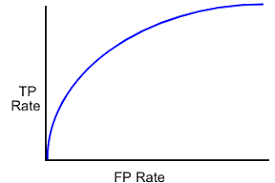

Menghitung roc-curve dari ketiga kelas

In [15]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

Plot ROC dari ketiga kelas / label

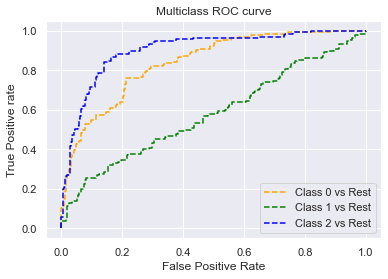

In [16]:
# Plot line dari ketiga kelas
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

# Menyetel atribut plot
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('Multiclass ROC',dpi=300);

### 2. Regression / Estimation / Prediction

Regression merupakan task supervised learning (pembelajaran dengan pengawasan) pada machine learning. Perbedaan classification dengan regression yaitu yang diprediksi pada classification merupakan kelas, sedangkan pada regression yang diprediksi adalah nilai kontinu atau numerik.

Contoh performance measure pada regression:
* MAE
* MSE
* RMSE
* RMSLE
* R2-Score
* Adjusted R2-Score

Berikut contoh regression beserta performance measure nya.

Pertama-tama kita membuat dataset yang berisi kamera sebagai x, dan harganya sebagai y

In [17]:
# Membuat data frame dari list 2d
data_1 = pd.DataFrame([[8, 7], [2, 3], [6, 7], [9, 10], [4, 2], [5, 6], [7, 8], [3, 3]])

# Memberikan header columns
data_1.columns = ['Kamera(x)', 'Harga(y)']

data_1

,Kamera(x),Harga(y)
0,8,7
1,2,3
2,6,7
3,9,10
4,4,2
5,5,6
6,7,8
7,3,3


Membagi data menjadi X dan y

In [18]:
X = data_1["Kamera(x)"].values[:, np.newaxis]
y = data_1["Harga(y)"].values

Membagi data menjadi data train dan data test, dengan besar data test 0.2 atau 20% dari keseluruhan dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state=3)

Metode/algoritma regression yang digunakan adalah Linear Regression. Terlebih dahulu kita membuat modelnya lalu melakukan training

In [20]:
# Membuat model linear regression
lr = LinearRegression()

# Meng-train / melatih data. Di sini saya mengganti parameter X dan y karena sepertinya terjadi kesalahan
lr.fit(X_train, y_train)

LinearRegression()

Melakukan prediksi terhadap x_test

In [21]:
y_pred = lr.predict(X_test)

y_pred

array([5.10784314, 2.99019608])

#### 1. MAE (Mean Absolute Error)

MAE merupakan jumlah rata-rata/mean dari selisih/error mutlak antara nilai prediksi dan nilai aktual.

$MAE=\frac{\sum_{i=1}^{n}abs(y_i-\hat{y_i})}{n}$

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.4509803921568629


#### 2. MSE (Mean Squared Error)

MSE merupakan rata-rata/mean kuadrat selisih/error antara antara nilai prediksi dan nilai aktual.

$MSE = \sum_{i=1}^{n}{\frac{(y_i-\hat{y_i})^2}{n}}$

In [23]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.3980199923106501


#### 3. RMSE (Root Mean Squared Error)

RMSE merupakan MSE yang diakarkan.

$RMSE = \sqrt{\sum_{i=1}^{n}{\frac{(y_i-\hat{y_i})^2}{n}}}$

In [24]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.6308882565959285


#### 4. RMSLE (Root Mean Squared Log Error)

RMSLE merupakan MSE yang dilogaritma-kan lalu diakarkan.

$RMSLE = \sqrt{\sum_{i=1}^{n}{\frac{(log(y_i+1)-log(\hat{y_i+1}))^2}{n}}}$

In [25]:
print("Log RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

Log RMSE -0.460626521511487


#### 5. R2-Score / R-Squared / Coefficient of Determination

R2-Score adalah metrik yang menghitung selisih antara sampel dalam kumpulan data dan prediksi yang dibuat oleh model. Pada dasarnya R2-Score menunjukkan seberapa cocok data sampel dengan model regresi dari kisaran 0-1 atau 0-100% dalam analisis regresi.

$R^2 = 1-\frac{SSE}{SST}$

$SSE = \sum_{i=1}^{n}(y_i-\hat{y_i})^2$ 

$SST = \sum_{i=1}^{n}({y_i}-\bar{y_i})^2 $ 
Ket:
- SSE = jumlah kuadrat akibat regresi (Variasi yang bisa dijelaskan)
- SST = Total jumlah kuadrat (Variasi Total)

In [26]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.823102225639711


#### 6. Adjusted R2-Score

Seperti yang kita tau, R2-Score digunakan untuk mengetahui kecocokan dalam analisis regresi, namun R2-Score memiliki kelemahan. 

Pada kasus dataset kamera dan harga misalnya, kita menambahkan satu atribut baru yaitu umur istri dari penjual hp yang tidak terlalu memengaruhi y dalam kasus ini kamera. Jika kita menghitung R2-Score, maka skornya akan tetap naik meskipun atribut baru tersebut tidak terlalu berpengaruh. 

Di sinilah kita menggunakan adjusted R2-Score yang memberikan penalti (mengurangi score) jika atribut yang ditambahkan tidak begitu memengaruhi prediksi.

$Adj\_R^2=1-(\frac{(1-R^2)\times (n-1)}{n-k-1})$

Ket :
- k = Jumlah variabel independen / atribut
- n = Jumlah sampel / baris

Menghitung R2-Score dan Adjusted R2-Score dari data

In [27]:
n= X.shape[0]
k= X.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))

print(f'R2-Score 1: {r2}, Adj R2-Score 1: {adj_r2_score}')

R2-Score 1: 0.823102225639711, Adj R2-Score 1: 0.7936192632463296


Sekarang kita menghitung R2-Score dan Adj R2-Score setelah menambah satu kolom atribut yang tidak berpengaruh kepada target

In [28]:
# Membuat data baru dari data 1 yang ditambah kolom baru
data_2= data_1.copy()
data_2.insert(1, 'umur_istri_penjual', np.random.randint(30, 50, len(data_2)))

# Membagi data train dan test
X2 = data_2.drop('Harga(y)', axis='columns')
y2 = data_2["Harga(y)"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size =  0.2, random_state=3)

# Regresi
lr = LinearRegression()
lr.fit(X_train2, y_train2)

y_pred2 = lr.predict(X_test2)

# Menghitung R2-Score dan Adj R2-Score
r2_2 = r2_score(y_test2,y_pred2)

n2= X2.shape[0]
k2= X2.shape[1]
adj_r2_2_score = 1 - ((1-r2_2)*(n2-1)/(n2-k2-1))

print(f'R2-Score 1: {r2}, Adj R2-Score 1: {adj_r2_score}')
print(f'R2-Score 2: {r2_2}, Adj R2-Score 2: {adj_r2_2_score}')

R2-Score 1: 0.823102225639711, Adj R2-Score 1: 0.7936192632463296
R2-Score 2: 0.8343508947726774, Adj R2-Score 2: 0.7680912526817484


Bisa dilihat bahwa R2-Score tetap naik pada data yang atributnya ditambah dengan data yang tidak berpengaruh pada harga, sementara pada adj R2-Score berkurang

### 3. Clustering

Clustering merupakan task unsupervised learning (pembelajaran tidak terawasi) machine learning untuk mengelompokkan data menjadi beberapa cluster berdasarkan kemiripan atau algoritma tertentu

In [29]:
# Mengimport data
df = pd.read_csv('dataset_iris.csv')

#  Tampilkan 5 data pertama
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Karena clustering merupakan task unsupervised learning, maka kita harus menghapus/drop kolom Species yang mana merupaka target class dari dataset

In [30]:
# Menghapus atribut yang tidak digunakan
df.drop(['Species'], axis=1, inplace=True)

# Menampilkan 5 data pertama
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Melakukan normalisasi dengan StandardScaler() dari library scikit-learn

In [31]:
df_scale = df

scaler = StandardScaler()

# Melakukan fit dan transform pada df_scale
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(150, 4)

Menampilkan 5 data pertama pada df_scale

In [32]:
df_scale[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Menjadikan df_scale sebuah dataframe lalu membuat data_cluster darinya

In [33]:
data = pd.DataFrame(df_scale)
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

data_cluster = data.copy()
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [34]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


#### 1. Elbow Method

Dalam beberapa algoritma / metode clustering seperti k-means atau kmodes, kita perlu menentukan n_cluster atau seberapa banyak cluster pada data, untuk mendapatkan n_cluster ideal kita dapat menggunakan elbow method.

Cara mendapatkan n_cluster yang ideal dari elbow method adalah dengan melakukan clustering n-1 kali dengan n_cluster dari 1 sampai n (idealnya 10) lalu mem-plot inersia nya. Selanjutnya melihat hasil plot, kita menentukan n_cluster ideal pada titik dengan belokan tertajam (titik yang terlihat seperti elbow/siku pada plot)

Text(0, 0.5, 'Inertia')

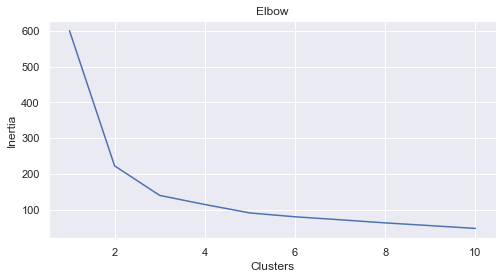

In [35]:
# Membuat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# Menampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Pada plot di atas kita mendapatkan siku atau elbow pada titik 2, 3, dan 4. Kita akan memilih 3 dan 4 sebagai n_cluster lalu melakukan clustering dengan metode K-Means

In [36]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4
0,-0.900681,1.019004,-1.340227,-1.315444,0,3
1,-1.143017,-0.131979,-1.340227,-1.315444,0,1
2,-1.385353,0.328414,-1.397064,-1.315444,0,1
3,-1.506521,0.098217,-1.283389,-1.315444,0,1
4,-1.021849,1.249201,-1.340227,-1.315444,0,3
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,0
146,0.553333,-1.282963,0.705921,0.922303,1,2
147,0.795669,-0.131979,0.819596,1.053935,2,0
148,0.432165,0.788808,0.933271,1.448832,2,0


Menampilkan hasil clustering melalui scatter plot

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


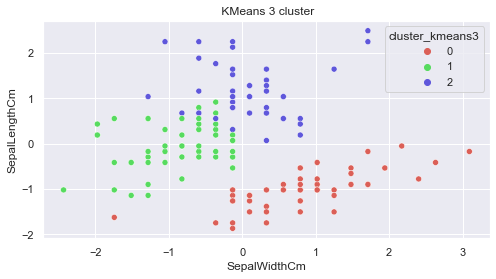

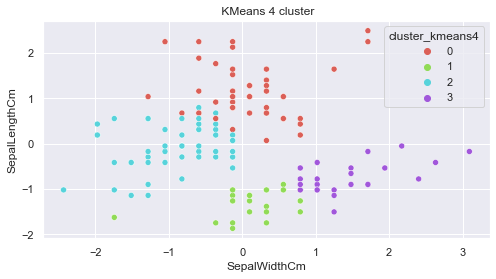

In [37]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

#### 2. Silhouette Score / Silhouette Distance

Silhouette Score adalah metrik yang digunakan untuk mengevaluasi model clustering, bisa juga untuk menentukan n_cluster. 

Nilai silhoette score berkisar dari -1 hingga 1. 
* 1: Cluster terpisah satu sama lain dan model clustering dibuat dengan baik
* 0: Jarak satu cluster dari cluster lain tidak signifikan
* -1: Di antara cluster tidak ada batas yang jelas, ini berarti model clustering nya salah

Mencari silhouette score dari model clustering kmeans untuk n_cluster 2, 3 dan 4

In [38]:
silhouette_scores = []

for k in range(2, 5):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.5397787397787398
Silhouette Score for k =  3 is 0.44479166666666664
Silhouette Score for k =  4 is 0.24166666666666664


Mem-plot silhouette score n_cluster 2, 3, dan 4

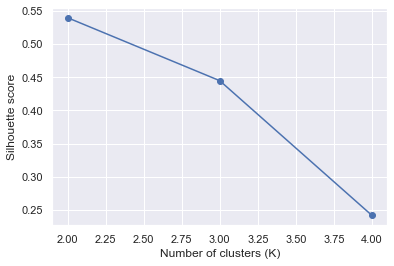

In [39]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')